In [ ]:
# HELPER

import random
import networkx as nx
import matplotlib.pyplot as plt


def load_graph_from_txt(filename="graph_coloring.txt"):
    with open(filename, "r", encoding="utf-8") as f:
        lines = [l.strip() for l in f if l.strip()]

    n = int(lines[0])
    vertices = lines[1].split()
    adj = [list(map(int, lines[i+2].split())) for i in range(n)]

    G = nx.Graph()
    for v in vertices:
        G.add_node(v)

    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] == 1:
                G.add_edge(vertices[i], vertices[j])

    return G, vertices, adj


def generate_random_graph(n, min_degree=2):
    vertices = [chr(ord('A') + i) for i in range(n)]
    adj = [[0] * n for _ in range(n)]

    for i in range(n):
        while sum(adj[i]) < min_degree:
            j = random.randint(0, n - 1)
            if i != j and adj[i][j] == 0:
                adj[i][j] = adj[j][i] = 1

    G = nx.Graph()
    for v in vertices:
        G.add_node(v)

    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] == 1:
                G.add_edge(vertices[i], vertices[j])

    return G, vertices, adj


def load_colors_from_txt(filename="colors.txt"):
    with open(filename, "r", encoding="utf-8") as f:
        return [c.strip() for c in f if c.strip()]


def print_adjacency_matrix(vertices, adj):
    print("\nMa trận kề đọc được:")
    print("   " + " ".join(vertices))
    for i, v in enumerate(vertices):
        print(f"{v} | " + " ".join(map(str, adj[i])))
    print("-" * 42)


def draw_graph_step(G, color_map, step, current_vertex):
    pos = nx.spring_layout(G, seed=42)
    node_colors = [color_map.get(v, "lightgray") for v in G.nodes()]

    plt.figure(figsize=(2, 2))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=300,
        edge_color="black"
    )
    plt.title(f"Bước {step}: tô đỉnh {current_vertex}")
    plt.show()


In [ ]:
# CORE

def greedy_coloring_step_by_step(G, vertices, adj, colors):
    n = len(vertices)

    degrees = {vertices[i]: sum(adj[i]) for i in range(n)}
    order = sorted(vertices, key=lambda v: degrees[v], reverse=True)

    print("Bậc từng đỉnh:")
    for v in vertices:
        print(f"  {v}: {degrees[v]}")
    print("-" * 42)

    print("Thứ tự duyệt:", " → ".join(order))
    print("-" * 42)

    color_map = {}
    step = 1

    for v in order:
        print("-" * 42)
        print(f"Bước {step}: xét đỉnh {v}")

        idx_v = vertices.index(v)
        forbidden = set()
        neighbors_colored = []

        for i in range(n):
            if adj[idx_v][i] == 1:
                u = vertices[i]
                if u in color_map:
                    forbidden.add(color_map[u])
                    neighbors_colored.append(u)

        print("  Đỉnh kề đã tô:")
        if neighbors_colored:
            for u in neighbors_colored:
                print(f"    {u}: {color_map[u]}")
        else:
            print("    Không")

        print("  Màu cấm:", list(forbidden) if forbidden else "Không")

        chosen_color = None
        for c in colors:
            if c not in forbidden:
                chosen_color = c
                break

        if chosen_color is None:
            print(f"Không thể tô đỉnh {v} với {len(colors)} màu đã chọn!")
            return None

        color_map[v] = chosen_color
        print(f"  → Gán màu cho {v}: {chosen_color}")

        draw_graph_step(G, color_map, step, v)
        step += 1

    print("-" * 42)
    return color_map



--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát

Ma trận kề đọc được:
   A B C D E F G H
A | 0 0 1 1 0 1 1 0
B | 0 0 0 1 1 0 1 1
C | 1 0 0 1 0 1 1 0
D | 1 1 1 0 0 0 0 0
E | 0 1 0 0 0 1 1 0
F | 1 0 1 0 1 0 0 1
G | 1 1 1 0 1 0 0 0
H | 0 1 0 0 0 1 0 0
------------------------------------------

Danh sách màu:
1. red
2. blue
3. green
4. yellow
5. purple
6. orange
→ Màu được sử dụng (3): ['red', 'green', 'purple']
Bậc từng đỉnh:
  A: 4
  B: 4
  C: 4
  D: 3
  E: 3
  F: 4
  G: 4
  H: 2
------------------------------------------
Thứ tự duyệt: A → B → C → F → G → D → E → H
------------------------------------------
------------------------------------------
Bước 1: xét đỉnh A
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho A: red


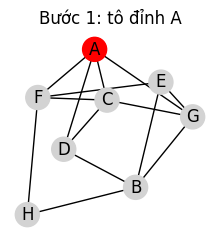

------------------------------------------
Bước 2: xét đỉnh B
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho B: red


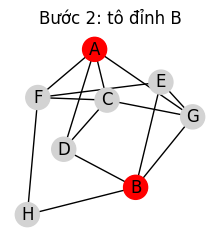

------------------------------------------
Bước 3: xét đỉnh C
  Đỉnh kề đã tô:
    A: red
  Màu cấm: ['red']
  → Gán màu cho C: green


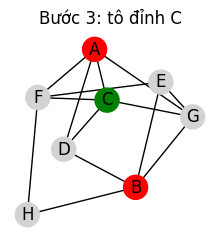

------------------------------------------
Bước 4: xét đỉnh F
  Đỉnh kề đã tô:
    A: red
    C: green
  Màu cấm: ['red', 'green']
  → Gán màu cho F: purple


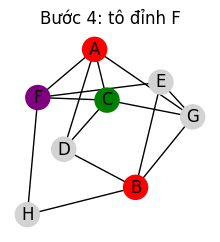

------------------------------------------
Bước 5: xét đỉnh G
  Đỉnh kề đã tô:
    A: red
    B: red
    C: green
  Màu cấm: ['red', 'green']
  → Gán màu cho G: purple


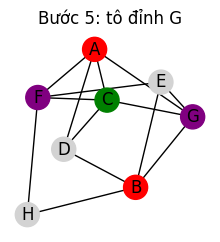

------------------------------------------
Bước 6: xét đỉnh D
  Đỉnh kề đã tô:
    A: red
    B: red
    C: green
  Màu cấm: ['red', 'green']
  → Gán màu cho D: purple


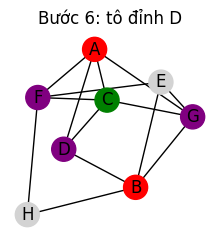

------------------------------------------
Bước 7: xét đỉnh E
  Đỉnh kề đã tô:
    B: red
    F: purple
    G: purple
  Màu cấm: ['red', 'purple']
  → Gán màu cho E: green


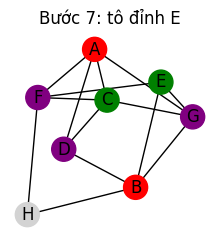

------------------------------------------
Bước 8: xét đỉnh H
  Đỉnh kề đã tô:
    B: red
    F: purple
  Màu cấm: ['red', 'purple']
  → Gán màu cho H: green


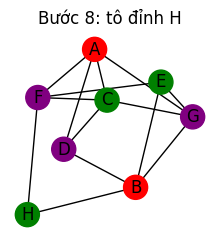

------------------------------------------

KẾT QUẢ CUỐI:
  A: red
  B: red
  C: green
  D: purple
  E: green
  F: purple
  G: purple
  H: green

--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát

Ma trận kề đọc được:
   A B C D E F
A | 0 1 0 0 1 0
B | 1 0 1 0 1 1
C | 0 1 0 1 0 0
D | 0 0 1 0 0 1
E | 1 1 0 0 0 0
F | 0 1 0 1 0 0
------------------------------------------

Danh sách màu:
1. red
2. blue
3. green
4. yellow
5. purple
6. orange
→ Màu được sử dụng (2): ['yellow', 'orange']
Bậc từng đỉnh:
  A: 2
  B: 4
  C: 2
  D: 2
  E: 2
  F: 2
------------------------------------------
Thứ tự duyệt: B → A → C → D → E → F
------------------------------------------
------------------------------------------
Bước 1: xét đỉnh B
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho B: yellow


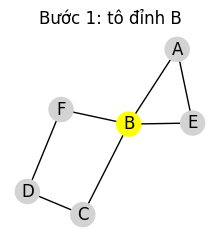

------------------------------------------
Bước 2: xét đỉnh A
  Đỉnh kề đã tô:
    B: yellow
  Màu cấm: ['yellow']
  → Gán màu cho A: orange


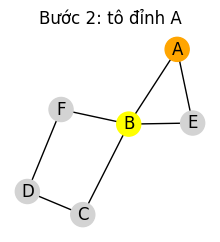

------------------------------------------
Bước 3: xét đỉnh C
  Đỉnh kề đã tô:
    B: yellow
  Màu cấm: ['yellow']
  → Gán màu cho C: orange


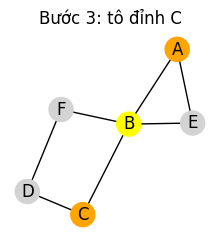

------------------------------------------
Bước 4: xét đỉnh D
  Đỉnh kề đã tô:
    C: orange
  Màu cấm: ['orange']
  → Gán màu cho D: yellow


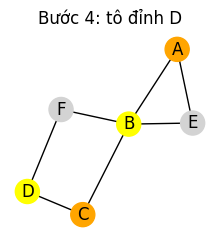

------------------------------------------
Bước 5: xét đỉnh E
  Đỉnh kề đã tô:
    A: orange
    B: yellow
  Màu cấm: ['orange', 'yellow']
Không thể tô đỉnh E với 2 màu đã chọn!

--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát


In [9]:
# =========================
# MAIN
# =========================

def main():
    while True:
        print("\n--- TÔ MÀU ĐỒ THỊ ---")
        print("1. Load từ file graph.txt")
        print("2. Random đồ thị")
        print("0. Thoát")
        choice = input("Chọn (0/1/2): ")

        if choice == "0":
            break

        elif choice == "1":
            G, vertices, adj = load_graph_from_txt("graph_coloring.txt")

        elif choice == "2":
            while True:
                n = input("Nhập số đỉnh (n >= 3): ")
                if n.isdigit() and int(n) >= 3:
                    n = int(n)
                    break
                print("Nhập sai!")

            G, vertices, adj = generate_random_graph(n, min_degree=2)

        else:
            print("Lựa chọn không hợp lệ!")
            continue

        print_adjacency_matrix(vertices, adj)

        # ===== LOAD MÀU =====
        all_colors = load_colors_from_txt("colors.txt")

        print("\nDanh sách màu:")
        for i, c in enumerate(all_colors, start=1):
            print(f"{i}. {c}")

        # ===== CHỌN MÀU THEO CHỈ SỐ =====
        while True:
            raw = input("\nNhập các chỉ số màu (vd: 1 3 4): ").strip()
            try:
                indices = list(map(int, raw.split()))
                if not indices:
                    raise ValueError

                if any(i < 1 or i > len(all_colors) for i in indices):
                    raise ValueError

                # loại trùng & giữ thứ tự
                indices = list(dict.fromkeys(indices))
                colors = [all_colors[i - 1] for i in indices]
                break
            except:
                print("Nhập sai! Vui lòng nhập dạng: 1 3 4")

        print(f"→ Màu được sử dụng ({len(colors)}):", colors)

        # ===== TÔ MÀU =====
        result = greedy_coloring_step_by_step(G, vertices, adj, colors)

        if result:
            print("\nKẾT QUẢ CUỐI:")
            for v in vertices:
                print(f"  {v}: {result[v]}")

        input("\nNhấn Enter để quay lại menu...")


if __name__ == "__main__":
    main()
